In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
import datetime
import joblib

In [59]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 500)

In [60]:
df = pd.read_csv(r'train-chennai-sale.csv')
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,12-04-1979,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [62]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [63]:
columns_to_Check = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET']

In [13]:
for col in columns_to_Check:
    print(col)
    print(df[col].unique())
    print('-----------------------------------')  

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
-----------------------------------
SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
-----------------------------------
PARK_FACIL
['Yes' 'No' 'Noo']
-----------------------------------
BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']
-----------------------------------
UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
-----------------------------------
STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
-----------------------------------


Handling Spellings of the values in the Columns

In [65]:
# Mapping dictionary for spelling corrections
area_mapping = {
    'Karapakkam': 'Karapakkam',
    'Karapakam': 'Karapakkam',
    'Anna Nagar': 'Anna Nagar',
    'Ana Nagar': 'Anna Nagar',
    'Ann Nagar': 'Anna Nagar',
    'Adyar': 'Adyar',
    'Adyr': 'Adyar',
    'Velachery': 'Velachery',
    'Velchery': 'Velachery',
    'Chrompet': 'Chrompet',
    'Chrompt': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Chormpet': 'Chrompet',
    'KK Nagar': 'KK Nagar',
    'KKNagar': 'KK Nagar',
    'TNagar': 'T Nagar',
    'T Nagar': 'T Nagar',
}

# Standardize AREA column
df['AREA'] = df['AREA'].replace(area_mapping)

In [66]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [67]:
# Mapping dictionary for spelling corrections
sale_cond_mapping = {
    'AbNormal': 'Abnormal',
    'Ab Normal': 'Abnormal',
    'Family': 'Family',
    'Partial': 'Partial',
    'Partiall': 'Partial',
    'PartiaLl': 'Partial',
    'AdjLand': 'Adjacent Land',
    'Adj Land': 'Adjacent Land',
    'Normal Sale': 'Normal Sale',
}

# Standardize SALE_COND column
df['SALE_COND'] = df['SALE_COND'].replace(sale_cond_mapping)

In [68]:
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'Partial', 'Adjacent Land', 'Normal Sale'],
      dtype=object)

In [69]:
# Mapping dictionary for spelling corrections
park_facil_mapping = {
    'Yes': 'Yes',
    'No': 'No',
    'Noo': 'No',
}

# Standardize PARK_FACIL column
df['PARK_FACIL'] = df['PARK_FACIL'].replace(park_facil_mapping)

In [70]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [71]:
# Standardizing BUILDTYPE
df['BUILDTYPE'] = df['BUILDTYPE'].str.strip().str.lower().replace({
    'commercial': 'Commercial',
    'comercial': 'Commercial',
    'others': 'Others',
    'other': 'Others',
    'house': 'House'
})

In [72]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [73]:
# Standardizing UTILITY_AVAIL
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.strip().str.lower().replace({
    'allpub': 'All Public Utilities',
    'all pub': 'All Public Utilities',
    'elo': 'Electricity Only',
    'nosewr': 'No Sewer',
    'nosewa': 'No Sewer'
})

In [74]:
df['UTILITY_AVAIL'].unique()

array(['All Public Utilities', 'Electricity Only', 'No Sewer'],
      dtype=object)

In [75]:
# Standardizing STREET
df['STREET'] = df['STREET'].str.strip().str.lower().replace({
    'paved': 'Paved',
    'pavd': 'Paved',
    'gravel': 'Gravel',
    'no access': 'No Access',
    'noaccess': 'No Access'
})

In [76]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

Handling Null Values

In [77]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [78]:
val_column = ["QS_ROOMS","QS_BATHROOM","QS_BEDROOM"]

target_column = "QS_OVERALL"

def fill_null(rows):
  if pd.isnull(rows[target_column]):
    return rows[val_column].mean()
  else:
    return rows[target_column]

In [79]:
df[target_column] = df.apply(fill_null,axis=1)

In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Checking Duplicate values

In [82]:
df.duplicated().sum()

np.int64(0)

Handling Data Types

In [83]:
df["DATE_SALE"]= pd.to_datetime(df["DATE_SALE"],format="%d-%m-%Y")
df["DATE_BUILD"] =  pd.to_datetime(df["DATE_BUILD"],format="%d-%m-%Y")

In [84]:
df['Age_of_building'] = df["DATE_BUILD"].apply(lambda i:datetime.datetime.now().year - i.year)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7103 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PRT_ID           7103 non-null   object        
 1   AREA             7103 non-null   object        
 2   INT_SQFT         7103 non-null   int64         
 3   DATE_SALE        7103 non-null   datetime64[ns]
 4   DIST_MAINROAD    7103 non-null   int64         
 5   N_BEDROOM        7103 non-null   float64       
 6   N_BATHROOM       7103 non-null   float64       
 7   N_ROOM           7103 non-null   int64         
 8   SALE_COND        7103 non-null   object        
 9   PARK_FACIL       7103 non-null   object        
 10  DATE_BUILD       7103 non-null   datetime64[ns]
 11  BUILDTYPE        7103 non-null   object        
 12  UTILITY_AVAIL    7103 non-null   object        
 13  STREET           7103 non-null   object        
 14  MZZONE           7103 non-null   object      

Detecting Outliers

In [86]:
def detect_outliers_zscore(data, threshold=3):

    # Select numeric columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    # Compute Z-scores
    z_scores = data[numeric_columns].apply(zscore)

    # Identify outliers
    outliers = (z_scores.abs() > threshold)

    # Summarize outliers
    outlier_summary = outliers.sum().sort_values(ascending=False).reset_index()
    outlier_summary.columns = ['Column', 'Outlier Count']

    return outlier_summary, outliers

# Applying the function to the uploaded dataset
outlier_summary, outliers = detect_outliers_zscore(df)

outlier_summary

,Column,Outlier Count
0,REG_FEE,91
1,COMMIS,73
2,SALES_PRICE,36
3,DIST_MAINROAD,0
4,INT_SQFT,0
5,N_ROOM,0
6,N_BATHROOM,0
7,N_BEDROOM,0
8,QS_ROOMS,0
9,QS_OVERALL,0


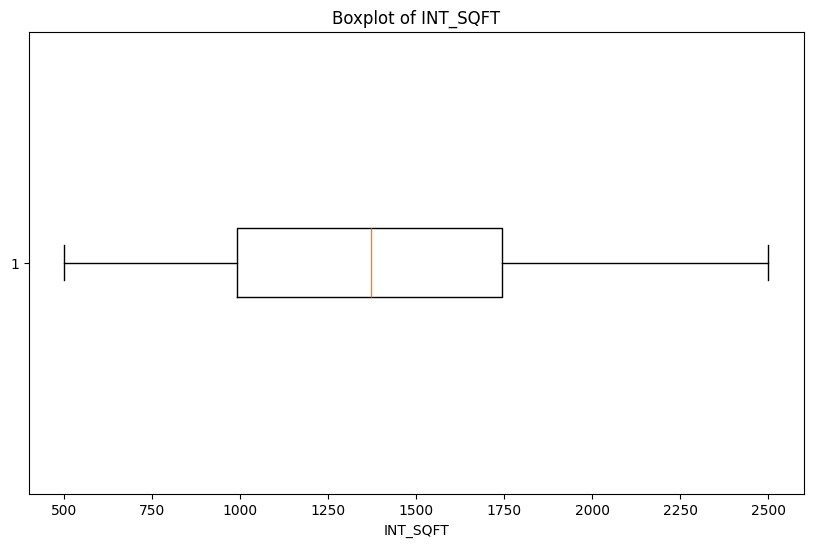

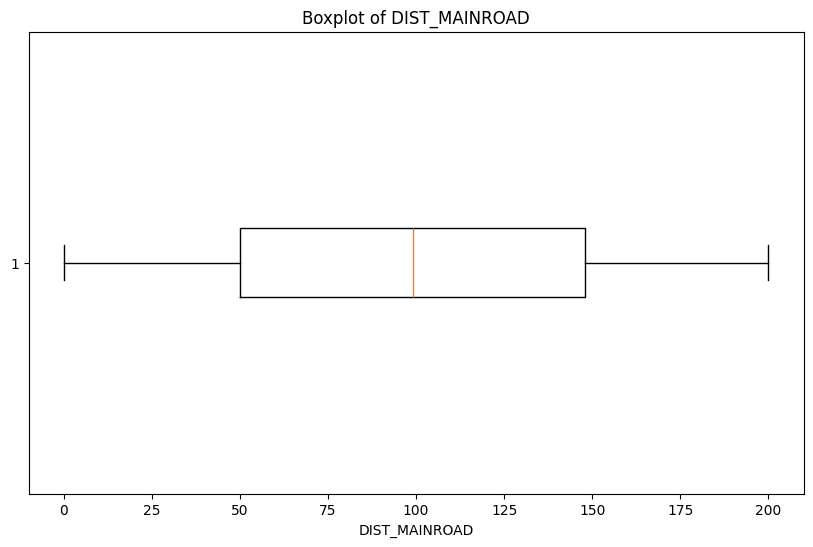

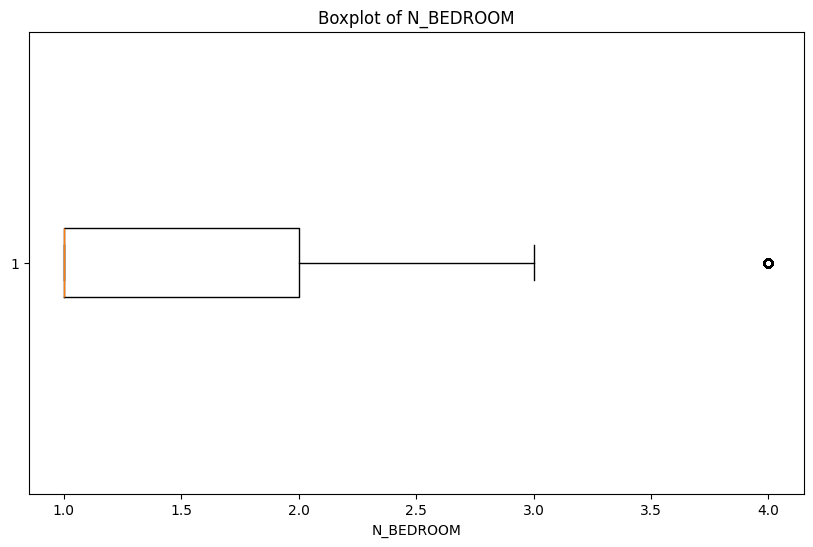

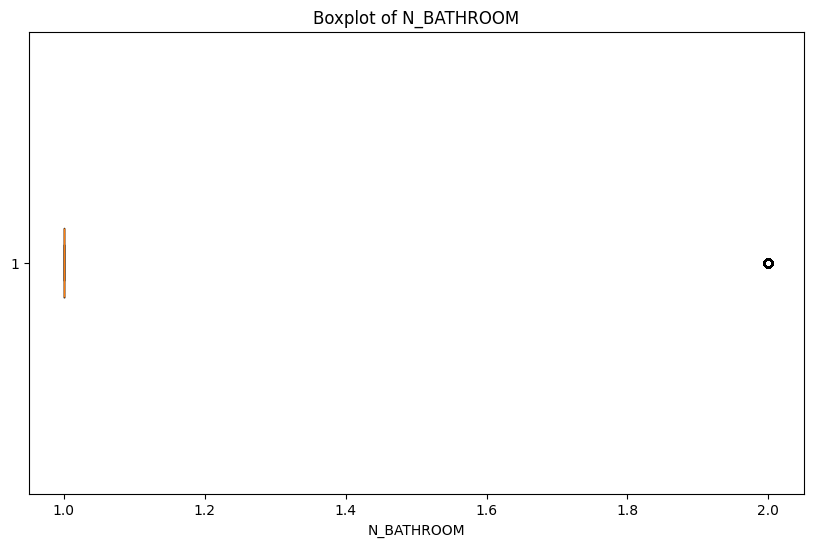

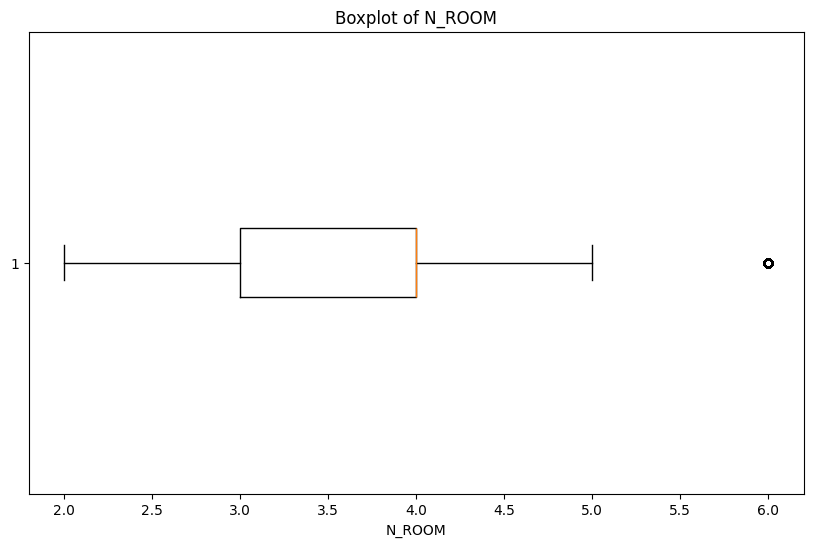

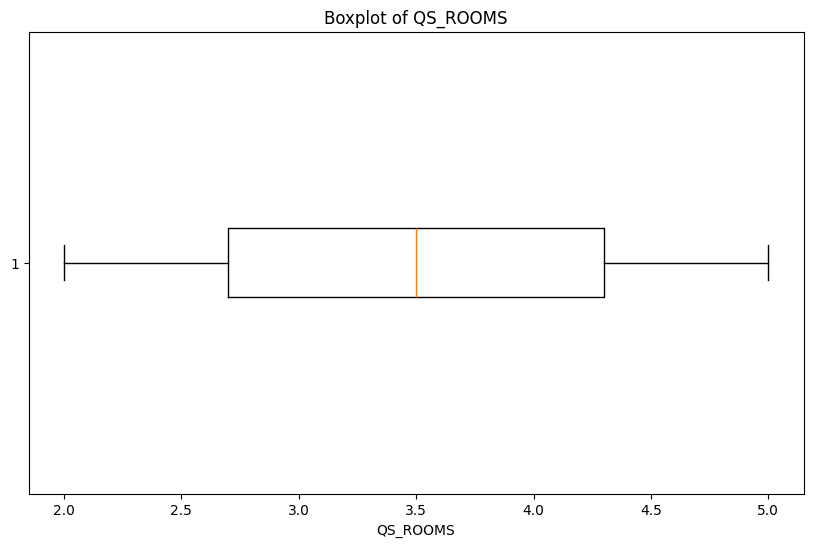

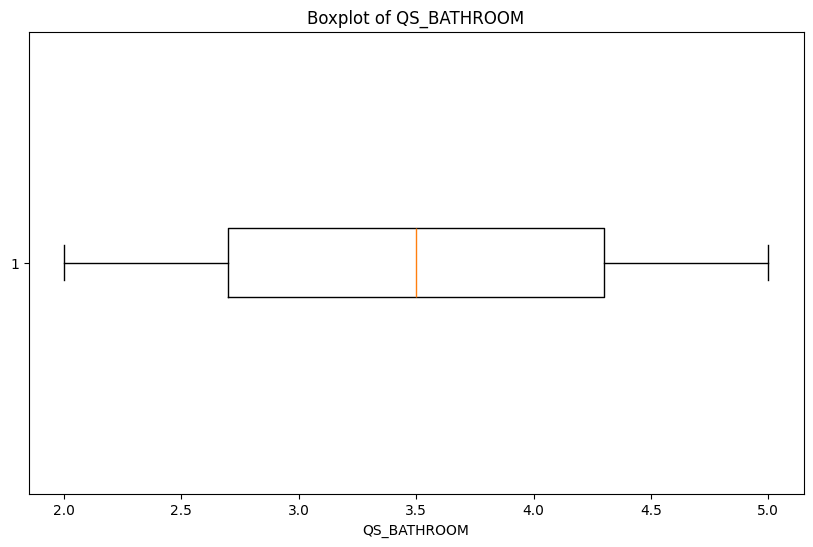

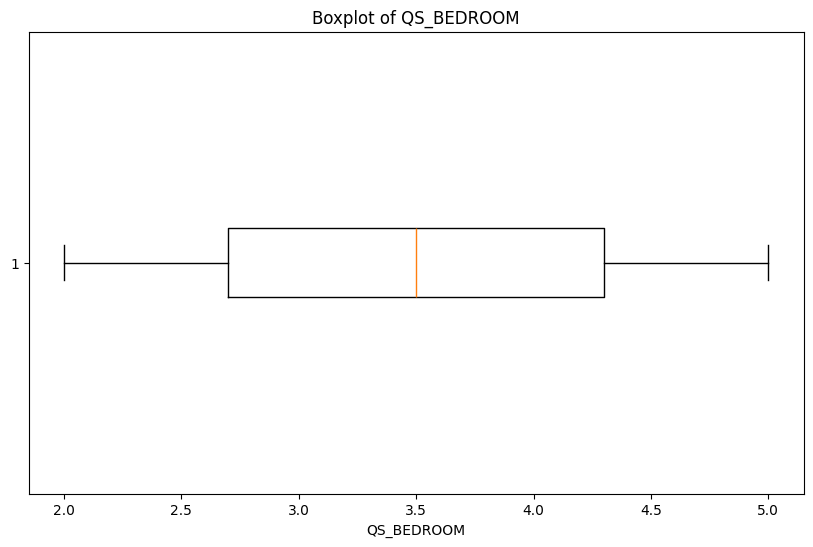

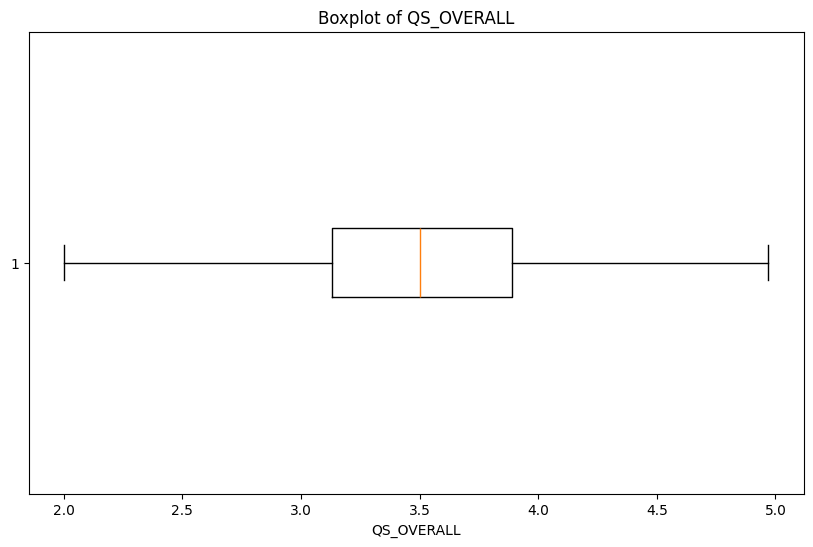

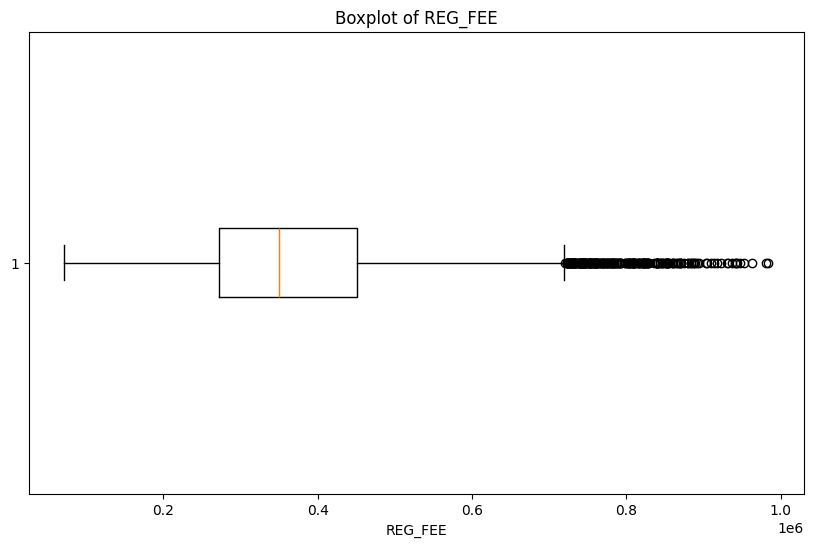

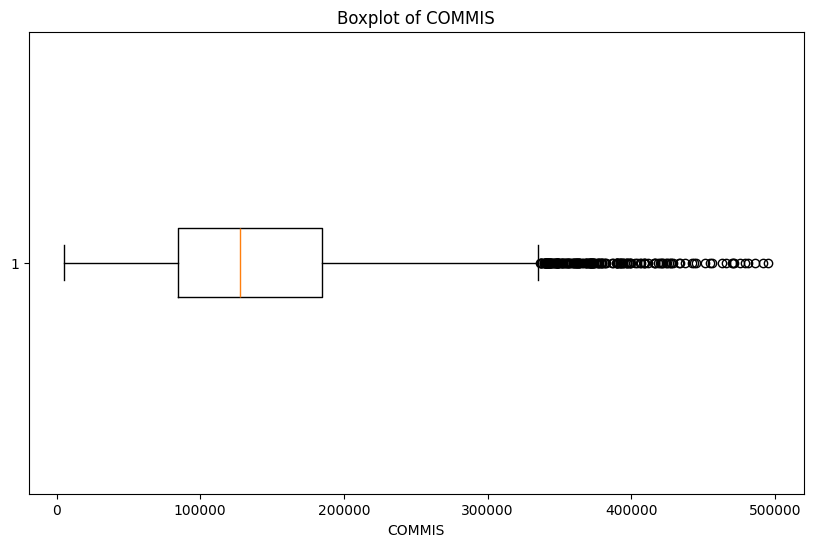

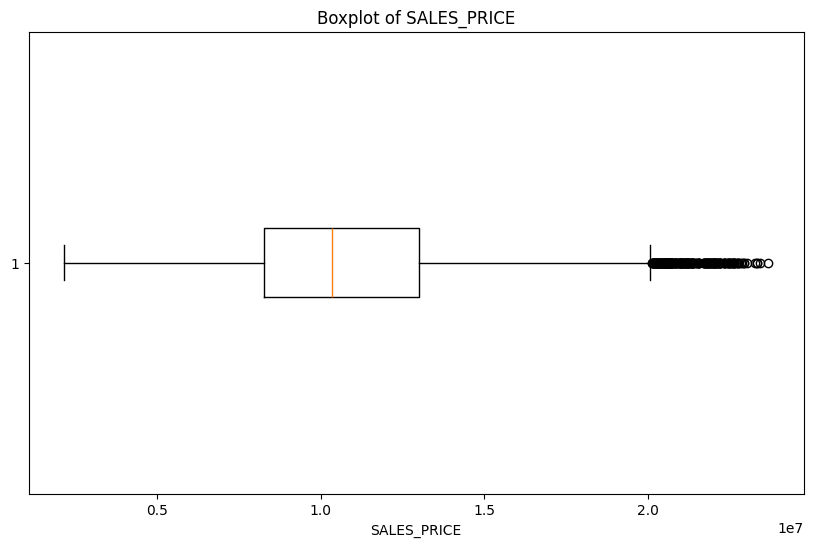

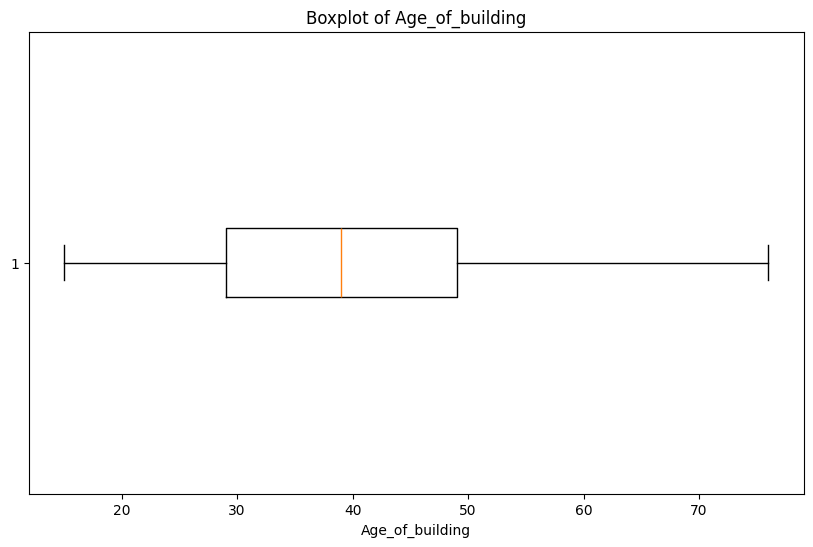

In [87]:
# Plotting boxplots for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [52]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'Age_of_building'], dtype='object')

Dropping Unwanted Columns

In [88]:
df.drop(columns = ['PRT_ID','DATE_BUILD','DATE_SALE'],inplace=True,axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7103 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AREA             7103 non-null   object 
 1   INT_SQFT         7103 non-null   int64  
 2   DIST_MAINROAD    7103 non-null   int64  
 3   N_BEDROOM        7103 non-null   float64
 4   N_BATHROOM       7103 non-null   float64
 5   N_ROOM           7103 non-null   int64  
 6   SALE_COND        7103 non-null   object 
 7   PARK_FACIL       7103 non-null   object 
 8   BUILDTYPE        7103 non-null   object 
 9   UTILITY_AVAIL    7103 non-null   object 
 10  STREET           7103 non-null   object 
 11  MZZONE           7103 non-null   object 
 12  QS_ROOMS         7103 non-null   float64
 13  QS_BATHROOM      7103 non-null   float64
 14  QS_BEDROOM       7103 non-null   float64
 15  QS_OVERALL       7103 non-null   float64
 16  REG_FEE          7103 non-null   int64  
 17  COMMIS           71

In [90]:
df.select_dtypes(include="object").columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'], dtype='object')

Encoding the Categorical Columns and also pickling the encoded columns

In [91]:
def encode_categorical_columns(data):

  encoders = {}

  for i in data.select_dtypes(include="object").columns:  
    print(i)
    encoder = LabelEncoder()
    data[i] = encoder.fit_transform(data[i])
    encoders[i] = encoder
  return data, encoders

df, encoded_Column = encode_categorical_columns(df)

# Save the best model (XGBoost)
joblib.dump(encoded_Column, 'encode_categorical_columns.pkl')
print("Model saved successfully as encode_categorical_columns.pkl")

AREA
SALE_COND
PARK_FACIL
BUILDTYPE
UTILITY_AVAIL
STREET
MZZONE
Model saved successfully as encode_categorical_columns.pkl


In [92]:
encoded_Column

{'AREA': LabelEncoder(),
 'SALE_COND': LabelEncoder(),
 'PARK_FACIL': LabelEncoder(),
 'BUILDTYPE': LabelEncoder(),
 'UTILITY_AVAIL': LabelEncoder(),
 'STREET': LabelEncoder(),
 'MZZONE': LabelEncoder()}

In [93]:
df.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Age_of_building
0,4,1004,131,1.0,1.0,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,380000,144400,7600000,58
1,1,1986,26,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770,30
2,0,909,70,1.0,1.0,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200,33
3,6,1855,14,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290,37
4,4,1226,84,1.0,1.0,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250,46
5,2,1220,36,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,409027,198316,12394750,16
6,2,1167,137,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,263152,33955,8488790,46
7,6,1847,176,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,604809,235204,16800250,29
8,2,771,175,1.0,1.0,2,1,0,2,2,2,5,2.9,3.7,4.0,3.550,257578,33236,8308970,48
9,6,1635,74,2.0,1.0,4,0,0,2,1,1,2,3.1,3.1,3.3,3.160,323346,121255,8083650,34


Finding Correlation Between Columns

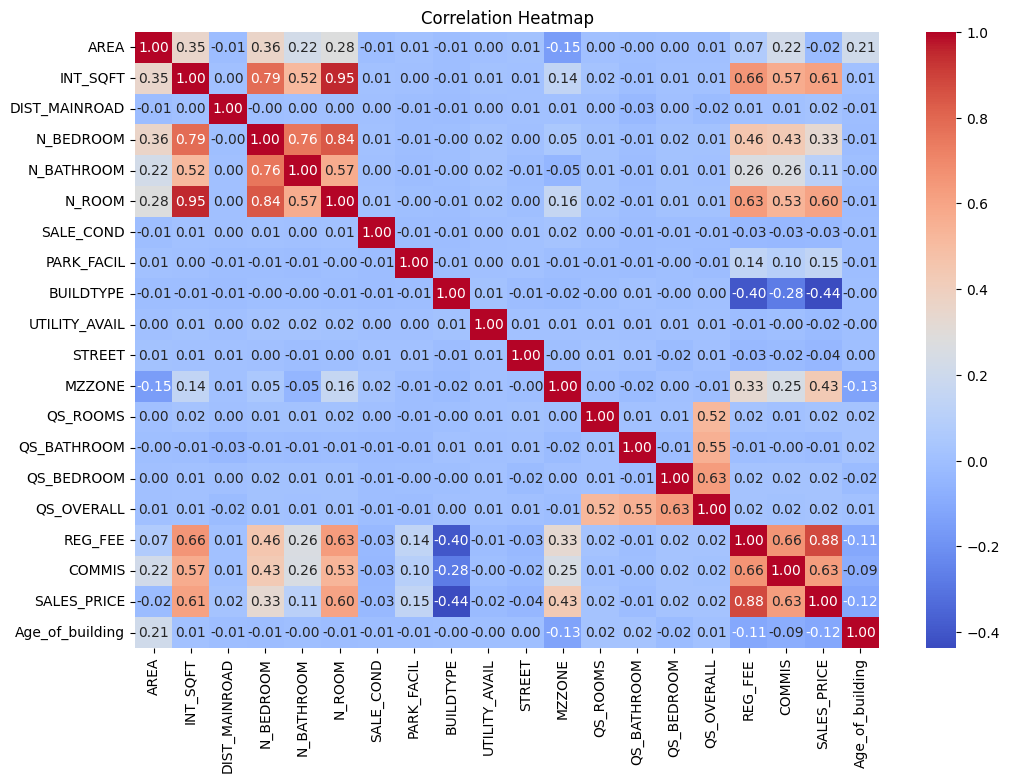

In [94]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [95]:
# Correlation of all columns with the target column 'SALES_PRICE'
target_correlation = df.corr()['SALES_PRICE'].sort_values(ascending=False)

# Display the results
print("Correlation of features with SALES_PRICE:\n", target_correlation)


Correlation of features with SALES_PRICE:
 SALES_PRICE        1.000000
REG_FEE            0.878126
COMMIS             0.626413
INT_SQFT           0.612026
N_ROOM             0.602637
MZZONE             0.427968
N_BEDROOM          0.330933
PARK_FACIL         0.146375
N_BATHROOM         0.108884
QS_ROOMS           0.021960
QS_OVERALL         0.019784
DIST_MAINROAD      0.018679
QS_BEDROOM         0.018430
QS_BATHROOM       -0.011361
AREA              -0.019009
UTILITY_AVAIL     -0.023831
SALE_COND         -0.030641
STREET            -0.042744
Age_of_building   -0.115908
BUILDTYPE         -0.436634
Name: SALES_PRICE, dtype: float64


Saving Preprocessed Data

In [96]:
df.to_csv("Preprocessed_data.csv",index=False)